In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
modelo = pd.read_csv('modelo_2m_samples.csv')

In [5]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 15 columns):
Unnamed: 0         int64
idaviso            int64
idpostulante       object
cant_vistas        float64
edad               float64
sexo               int64
orden_estudio      float64
titulo             object
descripcion        object
tipo_de_trabajo    float64
nivel_laboral      float64
nombre_zona        float64
nombre_area        object
nombre_empresa     object
se_postulo         int64
dtypes: float64(6), int64(4), object(5)
memory usage: 228.9+ MB


### Nivel de estudios vs Nivel laboral

Nivel de estudios:
- 1 = Otro
- 2 = Secundario
- 3 = Terciario/Técnico
- 4 = Universitario
- 5 = Posgrado
- 6 = Master
- 7 = Doctorado

Nivel laboral:
- 1 = Otro
- 2 = Junior
- 3 = Senior / Semi-Senior
- 4 = Jefe / Supervisor / Responsable
- 5 = Gerencia / Alta Gerencia / Dirección

In [14]:
modelo['orden_estudio'].value_counts()
#modelo['nivel_estudios'].value_counts()

9.0     449808
4.0     444147
0.0     422991
10.0    278643
7.0     115453
8.0      88569
6.0      83999
13.0     32726
3.0      20387
16.0     15365
12.0     15171
2.0      14422
15.0     12947
11.0      1979
14.0      1368
19.0       940
18.0       932
17.0       153
Name: orden_estudio, dtype: int64

In [13]:
modelo['nivel_laboral'].value_counts()

3.0    938721
0.0    544353
2.0    328782
1.0    124704
4.0     51726
5.0     11714
Name: nivel_laboral, dtype: int64

In [35]:
estudios_vs_laboral = pd.crosstab(modelo['nivel_laboral'], modelo['orden_estudio'])
estudios_vs_laboral

orden_estudio,0.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
nivel_laboral,,,,,,,,,,,,,,,,,,
0.0,341868,1930,2588,55196,10594,14869,11472,56031,37886,262,2115,4631,172,2004,2485,12,120,118
1.0,11015,1581,2093,41474,6925,8686,6234,30548,12795,105,702,1383,50,439,576,3,54,41
2.0,15855,2241,3749,81945,17972,21239,16740,108286,49266,290,2503,4386,173,2011,1806,20,161,139
3.0,51669,8415,11581,255354,46648,66752,50386,243184,158830,1136,8675,18716,794,7118,8279,104,524,556
4.0,2231,233,328,8908,1606,3251,3021,9898,15962,144,917,2563,125,1018,1396,9,51,65
5.0,353,22,48,1270,254,656,716,1861,3904,42,259,1047,54,357,823,5,22,21


Text(105,0.5,'Nivel laboral')

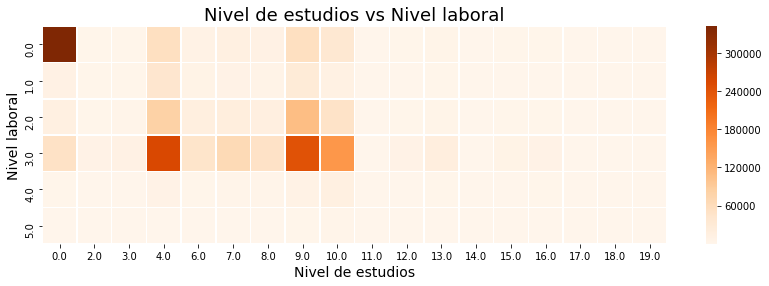

In [66]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudios_vs_laboral, cmap='Oranges', robust=False, annot=False,\
                      linewidths=.5, ax=ax)

heatmap.set_title('Nivel de estudios vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel de estudios', fontsize=14)
heatmap.set_ylabel('Nivel laboral', fontsize=14)

### Esta estudiando vs Tipo de trabajo

Esta estudiando:
- 0 = Está graduado o abandonó
- 1 = Tiene un título en curso

Tipo de trabajo:
- 1 = Voluntario
- 2 = Primer Empleo
- 3 = Fines de Semana
- 4 = Por Contrato
- 5 = Temporario
- 6 = Pasantia
- 7 = Por Horas
- 8 = Teletrabajo
- 9 = Part-time
- 10 = Full-time

In [41]:
#modelo['esta_estudiando'].value_counts()

In [42]:
modelo['tipo_de_trabajo'].value_counts()

10.0    1235955
0.0      544353
9.0      194913
6.0        7435
7.0        5170
5.0        4370
8.0        2682
3.0        2405
4.0        2277
2.0         402
1.0          38
Name: tipo_de_trabajo, dtype: int64

In [43]:
#estudiando_vs_tipo_trabajo = pd.crosstab(modelo['esta_estudiando'], modelo['tipo_de_trabajo'])
#estudiando_vs_tipo_trabajo

In [45]:
#bar_plot = estudiando_vs_tipo_trabajo.plot(kind='bar', color=['green','red'], legend=None,\
#                                           grid=False, figsize=(14,10), fontsize=14)

#bar_plot.set_title('Esta estudiando vs Tipo de trabajo', fontsize=18)
#bar_plot.set_xlabel('Esta estudiando', fontsize=14)
#bar_plot.set_ylabel('Tipo de trabajo', fontsize=14)
#bar_plot.legend(labels=['Esta estudiando','No esta estudiando'])

### Rango de edad vs Tipo de trabajo

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Tipo de trabajo:
- 1 = Voluntario
- 2 = Primer Empleo
- 3 = Fines de Semana
- 4 = Por Contrato
- 5 = Temporario
- 6 = Pasantia
- 7 = Por Horas
- 8 = Teletrabajo
- 9 = Part-time
- 10 = Full-time

In [47]:
#edad_vs_tipo_trabajo = pd.crosstab(modelo['rango_edad'], modelo['tipo_de_trabajo'])
#edad_vs_tipo_trabajo

In [50]:
#fig, ax = plt.subplots(figsize=(14,4))
#heatmap = sns.heatmap(edad_vs_tipo_trabajo, cmap='YlGnBu', annot=False, linewidths=.5, ax=ax)
#heatmap

### Rango de edad vs Nombre zona

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Nombre zona:
- 1 = Otros
- 2 = Capital Federal
- 3 = Gran Buenos Aires

In [64]:
#edad_vs_zona = pd.crosstab(modelo['rango_edad'], modelo['nombre_zona'])
#edad_vs_zona

In [67]:
#fig, ax = plt.subplots(figsize=(14,4))
#heatmap = sns.heatmap(edad_vs_zona, cmap='gist_gray', annot=False, linewidths=.5, ax=ax)
#heatmap